<a href="https://colab.research.google.com/github/maurovelez92/Python-Prep/blob/main/Micorizas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install --upgrade gspread

import pandas as pd
from google.colab import drive
from google.colab import auth
import gspread
from google.auth import default
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
# Configuración para acceder a Google Sheets
spreadsheet_name = 'Micorizas'  # Nombre de la hoja de cálculo
sheet_name = 'micorizas'  # Nombre de la pestaña

# Autorizar el acceso a la hoja de cálculo
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Abre la hoja de cálculo y accede a los datos
sh = gc.open(spreadsheet_name)
worksheet = sh.worksheet(sheet_name)

# Obtén los valores de la hoja de cálculo
data = worksheet.get_all_values()

# Verifica si los datos se cargaron correctamente
if not data:
    raise ValueError("La hoja de cálculo está vacía o no se cargó correctamente.")

# Convierte los datos en un DataFrame
header = data[0]  # La primera fila como encabezado
data_rows = data[1:]  # Las filas restantes como datos
df = pd.DataFrame(data_rows, columns=header)

# Asegúrate de que la primera columna sea texto
first_column = df.columns[0]  # Nombre de la primera columna
df[first_column] = df[first_column].astype(str)

# Corrige las demás columnas para convertirlas a numéricas
for col in df.columns[1:]:  # Excluye la primera columna
    try:
        # Reemplaza comas (`,`) por puntos (`.`) y convierte a numérico
        df[col] = pd.to_numeric(df[col].str.replace(',', '.'), errors='coerce')
    except:
        pass  # Ignora columnas que no necesitan conversión

# Verifica el DataFrame
print("Encabezados:", df.columns)
print("Primeras filas del DataFrame:")
print(df.head(11))  # Muestra las primeras filas
print("Tipos de datos:")
print(df.info())  # Muestra los tipos de datos de cada columna


Encabezados: Index(['TRATAMIENTO', 'Réplica', 'Longitud Raiz', 'Longitud Tallo', 'PH Tallo',
       'PS Tallo'],
      dtype='object')
Primeras filas del DataFrame:
   TRATAMIENTO  Réplica  Longitud Raiz  Longitud Tallo  PH Tallo  PS Tallo
0           SM      1.1           11.0            10.0    0.1715   0.03130
1           SM      1.2           10.5            13.0    0.1715   0.03130
2           SM      2.1           10.8            20.0    0.4415   0.15830
3           SM      2.2           10.0            20.2    0.4415   0.15830
4           CM      1.1           11.0            15.5    0.3433   0.05415
5           CM      1.2           11.5            16.0    0.3433   0.05415
6           CM      2.1            9.0            13.5    0.7982   0.04125
7           CM      2.2           10.0            13.5    0.7982   0.04125
8           CM      3.1           11.5            18.0    0.6521   0.10370
9           CM      3.2           13.0            17.0    0.6521   0.10370
10        

In [ ]:
# Convertir la columna 'replicas' a string
df['Réplica'] = df['Réplica'].astype(str)


In [ ]:
from scipy.stats import shapiro
import numpy as np
# Itera sobre las columnas numéricas del DataFrame
for column in df.select_dtypes(include=['number']).columns:
    # Realiza la prueba de Shapiro-Wilk
    stat, p = shapiro(df[column].dropna())  # Elimina los valores faltantes

    # Imprime los resultados
    alpha = 0.05
    if p > alpha:
        print(f"Los datos de la columna '{column}' son normales y su valor p es: {p}")
    else:
        print(f"Los datos de la columna '{column}' no son normales y su valor p es: {p}")



Los datos de la columna 'Longitud Raiz' son normales y su valor p es: 0.6359274122989422
Los datos de la columna 'Longitud Tallo' son normales y su valor p es: 0.811615480408374
Los datos de la columna 'PH Tallo' son normales y su valor p es: 0.2487052844707694
Los datos de la columna 'PS Tallo' no son normales y su valor p es: 0.04013464803619492


In [ ]:
# Paso 1: Importar bibliotecas necesarias
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from scipy.stats import shapiro

# Paso 2: Iterar por columnas numéricas y verificar normalidad
for column in df.select_dtypes(include=['number']).columns:
    stat, p = shapiro(df[column].dropna())
    alpha = 0.05
    if p <= alpha:  # Si no es normal, aplicar transformación
        print(f"La columna '{column}' no es normal (p = {p:.3f}). Aplicando transformación Box-Cox.")

        # Crear el objeto PowerTransformer con método Yeo-Johnson
        transformer = PowerTransformer(method='yeo-johnson', standardize=False)

        # Aplicar la transformación a la columna
        #transformed_data = transformer.fit_transform(df[[column]])

        # Ajustar los valores transformados al rango [0, 1] con MinMaxScaler
        scaler = MinMaxScaler(feature_range=(0, 1))
        df[column + '_norm'] = transformer.fit_transform(df[[column]])

# Paso 3: Verificar nuevamente la normalidad de las columnas transformadas
for column in df.filter(like='_norm').columns:
    stat, p = shapiro(df[column].dropna())
    if p > alpha:
        print(f"La columna transformada '{column}' ahora es normal (p = {p:.3f}).")
    else:
        print(f"La columna transformada '{column}' aún NO es normal (p = {p:.3f}).")

# Imprimir DataFrame final
print(df)



La columna 'PS Tallo' no es normal (p = 0.040). Aplicando transformación Box-Cox.
La columna transformada 'PS Tallo_norm' ahora es normal (p = 0.090).
   TRATAMIENTO Réplica  Longitud Raiz  Longitud Tallo  PH Tallo  PS Tallo  \
0           SM     1.1           11.0            10.0    0.1715   0.03130   
1           SM     1.2           10.5            13.0    0.1715   0.03130   
2           SM     2.1           10.8            20.0    0.4415   0.15830   
3           SM     2.2           10.0            20.2    0.4415   0.15830   
4           CM     1.1           11.0            15.5    0.3433   0.05415   
5           CM     1.2           11.5            16.0    0.3433   0.05415   
6           CM     2.1            9.0            13.5    0.7982   0.04125   
7           CM     2.2           10.0            13.5    0.7982   0.04125   
8           CM     3.1           11.5            18.0    0.6521   0.10370   
9           CM     3.2           13.0            17.0    0.6521   0.10370   
10

In [ ]:
#Verificar normalizacion de los datos
# Itera sobre las columnas numéricas del DataFrame
for column in df.select_dtypes(include=['number']).columns:
    # Realiza la prueba de Shapiro-Wilk
    stat, p = shapiro(df[column].dropna())  # Elimina los valores faltantes

    # Imprime los resultados
    alpha = 0.05
    if p > alpha:
        print(f"Los datos de la columna '{column}' son normales (p = {p:.3f})")
    else:
        print(f"Los datos de la columna '{column}' NO son normales (p = {p:.3f})")


# Imprime el DataFrame con las columnas normalizadas
df

Los datos de la columna 'Longitud Raiz' son normales (p = 0.636)
Los datos de la columna 'Longitud Tallo' son normales (p = 0.812)
Los datos de la columna 'PH Tallo' son normales (p = 0.249)
Los datos de la columna 'PS Tallo' NO son normales (p = 0.040)
Los datos de la columna 'PS Tallo_norm' son normales (p = 0.090)


,TRATAMIENTO,Réplica,Longitud Raiz,Longitud Tallo,PH Tallo,PS Tallo,PS Tallo_norm
0,SM,1.1,11.0,10.0,0.1715,0.03130,0.026509
1,SM,1.2,10.5,13.0,0.1715,0.03130,0.026509
2,SM,2.1,10.8,20.0,0.4415,0.15830,0.076844
3,SM,2.2,10.0,20.2,0.4415,0.15830,0.076844
4,CM,1.1,11.0,15.5,0.3433,0.05415,0.040948
5,CM,1.2,11.5,16.0,0.3433,0.05415,0.040948
6,CM,2.1,9.0,13.5,0.7982,0.04125,0.033228
7,CM,2.2,10.0,13.5,0.7982,0.04125,0.033228
8,CM,3.1,11.5,18.0,0.6521,0.10370,0.062627
9,CM,3.2,13.0,17.0,0.6521,0.10370,0.062627


In [ ]:
#Homoceasticidad de las variable
from scipy.stats import levene

# Verificar la homocedasticidad usando la prueba de Levene
for column in df.select_dtypes(include=['number']).columns:
    # Agrupa los datos por la primera columna (variable categórica)
    groups = [df[column][df[df.columns[0]] == value].dropna() for value in df[df.columns[0]].unique()]

    # Realiza la prueba de Levene
    stat, p = levene(*groups)

    # Imprime los resultados
    alpha = 0.05
    if p > alpha:
        print(f"Las varianzas de la columna '{column}' son iguales (p = {p:.3f}).")
    else:
        print(f"Las varianzas de la columna '{column}' NO son iguales (p = {p:.3f}).")

Las varianzas de la columna 'Longitud Raiz' son iguales (p = 0.099).
Las varianzas de la columna 'Longitud Tallo' NO son iguales (p = 0.003).
Las varianzas de la columna 'PH Tallo' son iguales (p = 0.945).
Las varianzas de la columna 'PS Tallo' NO son iguales (p = 0.011).
Las varianzas de la columna 'PS Tallo_norm' NO son iguales (p = 0.026).


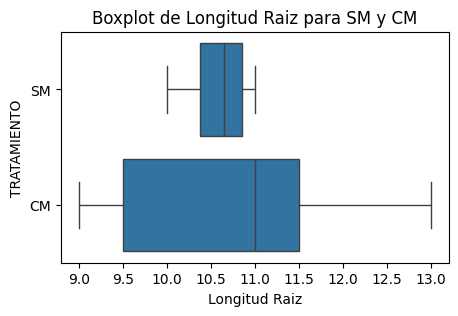

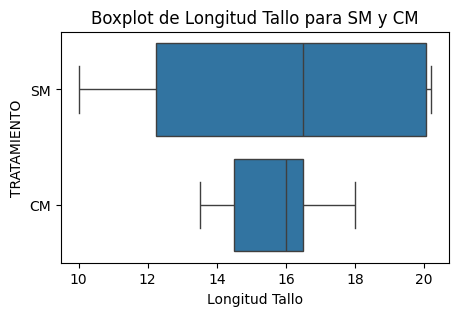

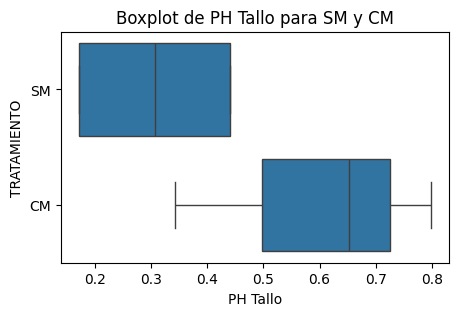

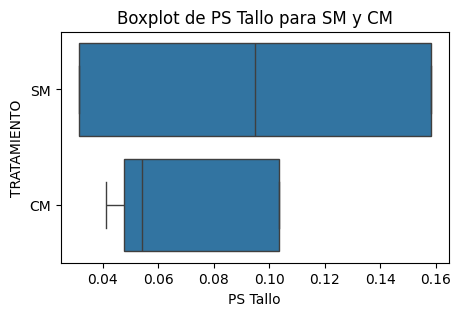

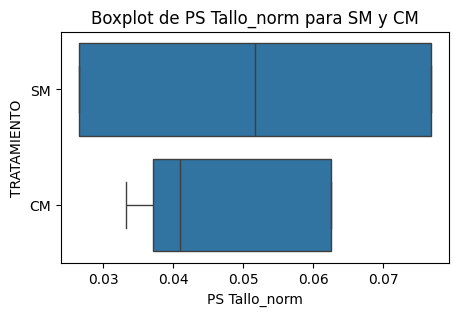

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar el DataFrame para incluir solo las filas con tratamientos "SMR" y "CMR"
df_filtered = df[df['TRATAMIENTO'].isin(['SM', 'CM'])]

# Iterar sobre las columnas numéricas del DataFrame filtrado
for column in df_filtered.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(5, 3))  # Ajustar el tamaño de la figura
    sns.boxplot(x=column, y='TRATAMIENTO', data=df_filtered)
    plt.title(f'Boxplot de {column} para SM y CM')
    plt.xlabel(column)
    plt.ylabel('TRATAMIENTO')
    plt.show()

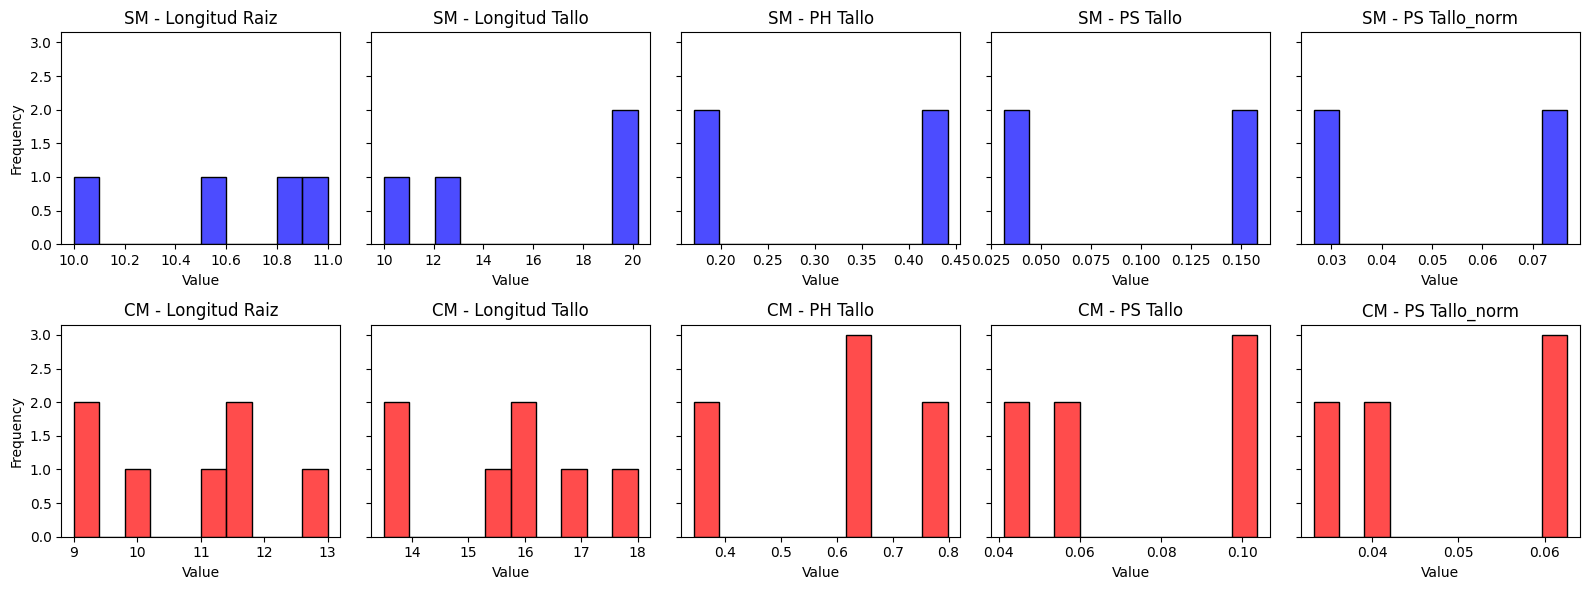

In [ ]:

# Filtrar el DataFrame para incluir solo tratamientos SM y CM
df_filtered = df[df['TRATAMIENTO'].isin(['SM', 'CM'])]

# Identificar columnas numéricas
num_cols = df_filtered.select_dtypes(include=['number']).columns
num_plots = len(num_cols)

# Configurar subplots: 2 filas (SM y CM) y tantas columnas como variables numéricas
fig, axes = plt.subplots(2, num_plots, figsize=(16, 6), sharey=True)

# Crear histogramas para SM
df_sm = df_filtered[df_filtered['TRATAMIENTO'] == 'SM']
for i, column in enumerate(num_cols):
    sns.histplot(
        data=df_sm,
        x=column,
        ax=axes[0, i],
        bins=10,
        kde=False,
        color="blue",
        alpha=0.7
    )
    axes[0, i].set_title(f"SM - {column}")
    axes[0, i].set_xlabel('Value')
    axes[0, i].set_ylabel('Frequency')

# Crear histogramas para CM
df_cm = df_filtered[df_filtered['TRATAMIENTO'] == 'CM']
for i, column in enumerate(num_cols):
    sns.histplot(
        data=df_cm,
        x=column,
        ax=axes[1, i],
        bins=10,
        kde=False,
        color="red",
        alpha=0.7
    )
    axes[1, i].set_title(f"CM - {column}")
    axes[1, i].set_xlabel('Value')
    axes[1, i].set_ylabel('Frequency')

# Ajustar diseño
plt.tight_layout()
plt.show()

In [ ]:
numeric_df = df.select_dtypes(include=np.number).drop(columns=['PS Tallo'], errors='ignore')

# Display the new DataFrame
numeric_df

,Longitud Raiz,Longitud Tallo,PH Tallo,PS Tallo_norm
0,11.0,10.0,0.1715,0.026509
1,10.5,13.0,0.1715,0.026509
2,10.8,20.0,0.4415,0.076844
3,10.0,20.2,0.4415,0.076844
4,11.0,15.5,0.3433,0.040948
5,11.5,16.0,0.3433,0.040948
6,9.0,13.5,0.7982,0.033228
7,10.0,13.5,0.7982,0.033228
8,11.5,18.0,0.6521,0.062627
9,13.0,17.0,0.6521,0.062627


In [ ]:
# Calcular la correlación de Spearman
correlation_spearman = numeric_df.corr(method='spearman')

# Calcular la correlación de Pearson
correlation_pearson = numeric_df.corr(method='pearson')

print("Correlación de Spearman:")
print(correlation_spearman)
print("\nCorrelación de Pearson:")
correlation_pearson

Correlación de Spearman:
                Longitud Raiz  Longitud Tallo  PH Tallo  PS Tallo_norm
Longitud Raiz        1.000000        0.184334 -0.345809       0.088789
Longitud Tallo       0.184334        1.000000  0.239558       0.974513
PH Tallo            -0.345809        0.239558  1.000000       0.264151
PS Tallo_norm        0.088789        0.974513  0.264151       1.000000

Correlación de Pearson:


,Longitud Raiz,Longitud Tallo,PH Tallo,PS Tallo_norm
Longitud Raiz,1.000000,0.163849,-0.254268,0.129919
Longitud Tallo,0.163849,1.000000,0.214617,0.929660
PH Tallo,-0.254268,0.214617,1.000000,0.246484
PS Tallo_norm,0.129919,0.929660,0.246484,1.000000


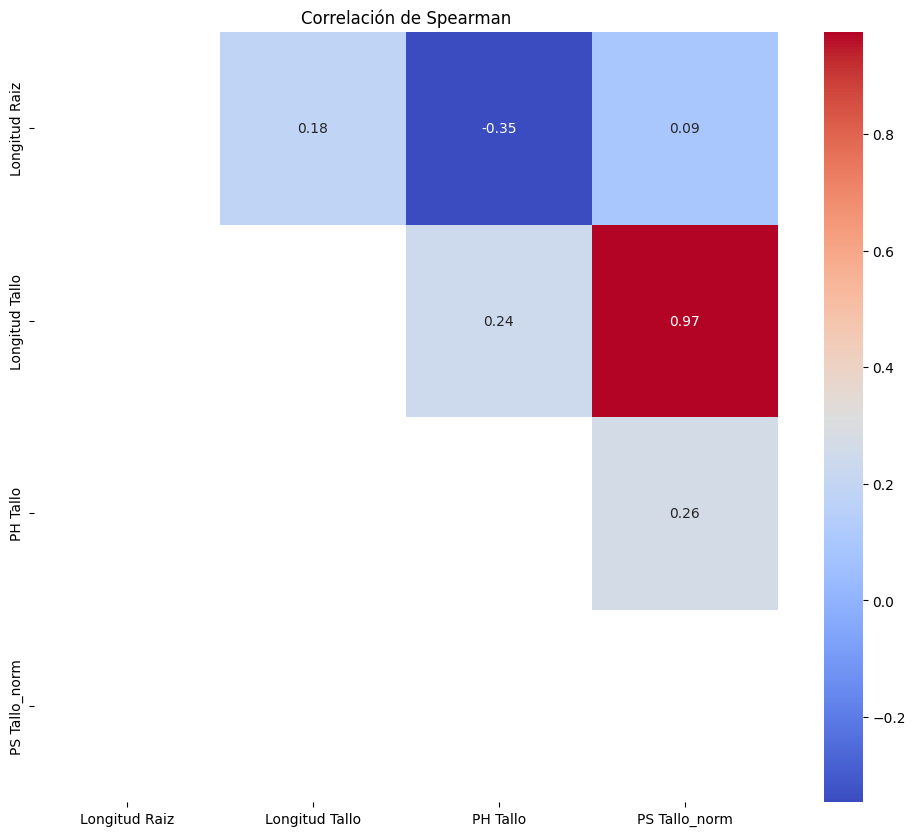

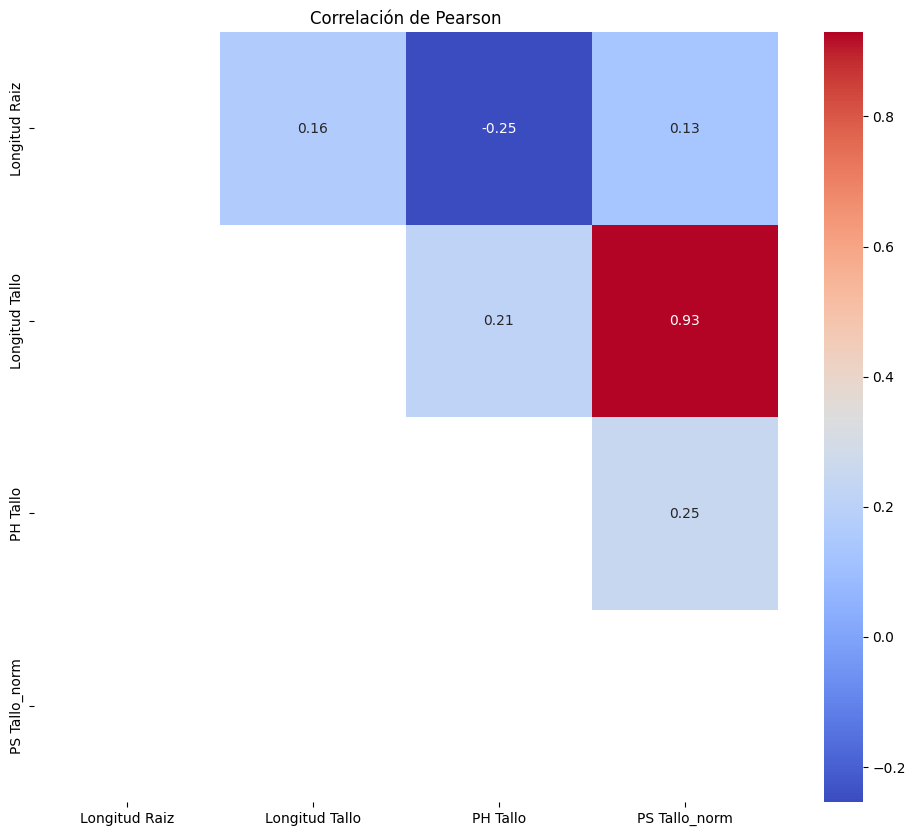

In [ ]:

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_spearman, annot=True, cmap='coolwarm', mask=np.tril(correlation_spearman), fmt=".2f")
plt.title('Correlación de Spearman')
plt.show()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_pearson, annot=True, cmap='coolwarm', mask=np.tril(correlation_pearson), fmt=".2f")
plt.title('Correlación de Pearson')
plt.show()